In [80]:
# importing Required libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# importing Data using Pandas library

data=pd.read_csv(r"D:\archive (4)\googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.select_dtypes(include=['object']).columns.tolist()

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [4]:
data.select_dtypes(exclude=['object']).columns.tolist()

['Rating']

In [5]:
#Shape of data

data.shape

(10841, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# checking missing values

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Fill null values based on column data type

data['Rating'].fillna(data['Rating'].mean(),inplace=True) 
data['Type'].fillna("paid",inplace=True)
data['Current Ver'].fillna("don't know",inplace=True)
data['Android Ver'].fillna("unidentify",inplace=True)
data['Content Rating'].fillna("Teen",inplace=True)

In [9]:
# checking the percentage of missing Values

np.round(((data.isnull().sum()/len(data))*100),2)

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [10]:
data.shape

(10841, 13)

In [11]:
data['Size'].str.replace('\d+', '').unique()

array(['M', '.M', 'Varies with device', 'k', '.k', ',+'], dtype=object)

In [12]:
def convert_to_kb(data):
    data.loc[data['Size'].str.contains('M'),'Size'] = data.loc[data['Size'].str.contains('M'),'Size'].str.rstrip('M').astype(float) * 1024

convert_to_kb(data)

In [13]:
data['Size'].replace('Varies with device', np.nan, inplace = True)

# removing the k 
data.loc[data['Size'].astype(str).str.contains('k'),'Size'] = data.loc[data['Size'].astype(str).str.contains('k'),'Size'].str.replace('k', '')

#renaming the column size
data.rename(columns = {'Size': 'Size(kb)'}, inplace = True)


In [14]:
# removing plus sign
def remove_plus(data, col):
    data[col] = data[col].astype(str).str.replace('+', '', regex = False)

remove_plus(data,'Size(kb)')

# removing commas 
def remove_commas(data,col):
    data[col] = data[col].astype(str).str.replace(',', '')

remove_commas(data,'Size(kb)')

In [15]:
data['Size(kb)'].astype(float)

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        NaN
10840    19456.0
Name: Size(kb), Length: 10841, dtype: float64

In [16]:
data['Size(kb)'].isnull().sum()

0

In [19]:
# cleaning installs column
data['Installs'] = data['Installs'].astype(str).str.replace('+', '', regex = False)
data['Installs'] = data['Installs'].astype(str).str.replace(',', '')
data['Installs'] = data['Installs'].astype(str).str.replace('Free', '1.0')

In [20]:
data['Installs'].astype(float)

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [24]:
# cleaning price column
data['Price'] = data['Price'].astype(str).str.replace('$', '')
data['Price'] = data['Price'].astype(str).str.replace('Everyone', '0')

In [28]:
data['Price'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [56]:
data['Reviews'] = data['Reviews'] .astype(str).str.replace('M', '')

In [57]:
# changing the dtypes
data = data.astype({"Size(kb)":"float","Installs":"float","Rating":"float","Price":"float","Reviews":"float"})
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews           float64
Size(kb)          float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size(kb)        9146 non-null   float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [60]:
data['Size(kb)'].fillna(data['Size(kb)'].mean(),inplace=True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size(kb)        10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [74]:
# categorical columns
c=data.select_dtypes(include=['object']).columns
c

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [76]:
# numerical columns 
n=data.select_dtypes(exclude=['object']).columns
n

Index(['Rating', 'Reviews', 'Size(kb)', 'Installs', 'Price'], dtype='object')

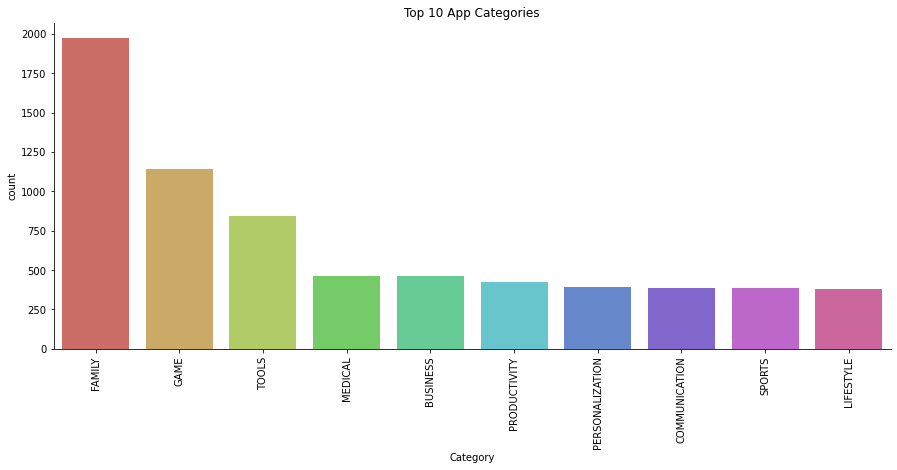

In [83]:
top_categories = data['Category'].value_counts().head(10)
plt.figure(figsize = (15,6))
sns.countplot(x = data['Category'], order = top_categories.index, palette = 'hls', )
plt.title("Top 10 App Categories")
plt.xticks(rotation = 90)
sns.despine()
plt.show()

<div class="alert alert-info">Family and Game are 2 most famous categories with most number of apps</div>

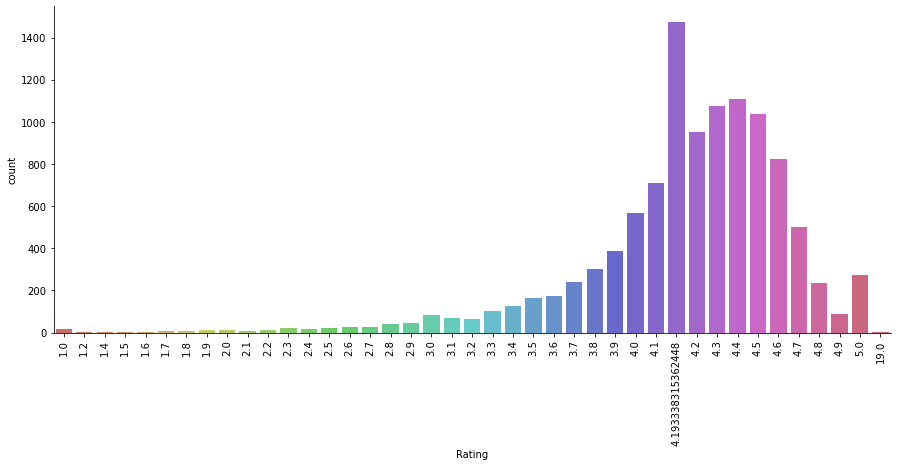

In [86]:
plt.figure(figsize= (15,6))
sns.countplot(data = data, x= 'Rating', palette = 'hls')
plt.xticks(rotation = 90)
sns.despine()

plt.show()

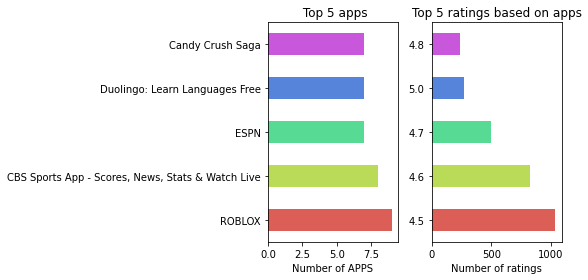

In [126]:
plt.rcParams['figure.figsize'] = 8,4
plt.subplot(1,2,1)
data.App.value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of APPS")
plt.title(" Top 5 apps")

plt.subplot(1,2,2)
data[data['Rating']>=4.5]['Rating'].value_counts().nlargest(5).plot(kind = "barh", color = sns.color_palette('hls',5))
plt.xlabel("Number of ratings")
plt.title("Top 5 ratings based on apps")
plt.tight_layout()

<div class="alert alert-warning">Duolingo:Learn Languages Free and Candy Crush Saga are 2 highest rating apps.</div>  

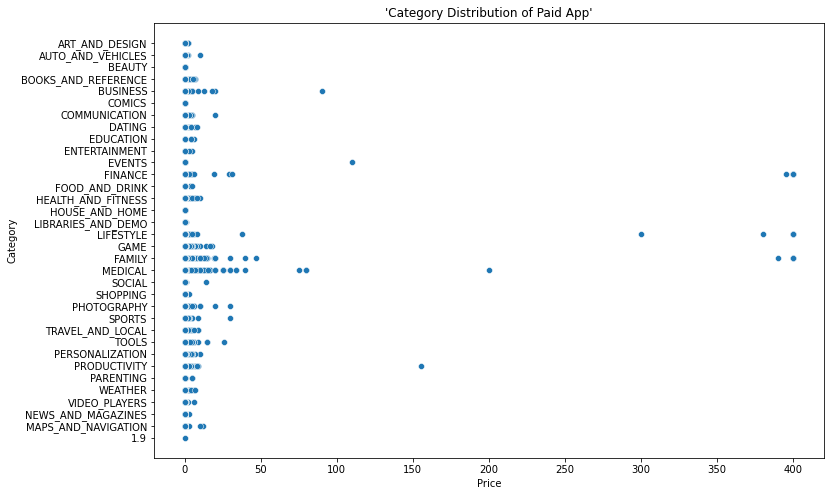

In [97]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Price', y='Category', data=data).set_title("'Category Distribution of Paid App'");

<div class="alert alert-info">Few paid apps are expensive in the Finance, Family, and Lifestyle categories and 
There are very few paid apps.</div>

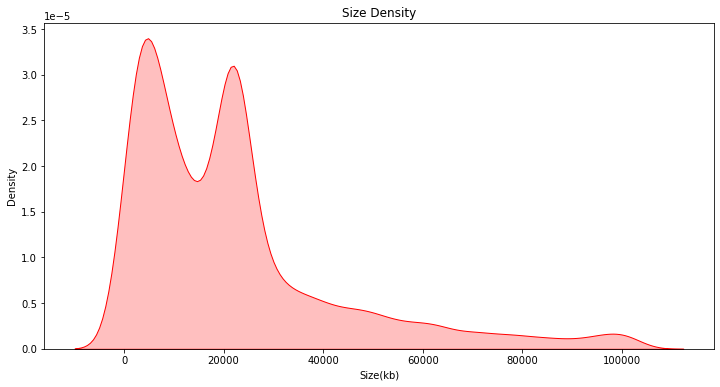

In [103]:
plt.figure(figsize=(12,6))
sns.kdeplot(data['Size(kb)'], color="red", shade = True);
plt.title('Size Density');

<div class="alert alert-danger">Average Size(MB) of applications in the Google Play Store is 21.53</div>

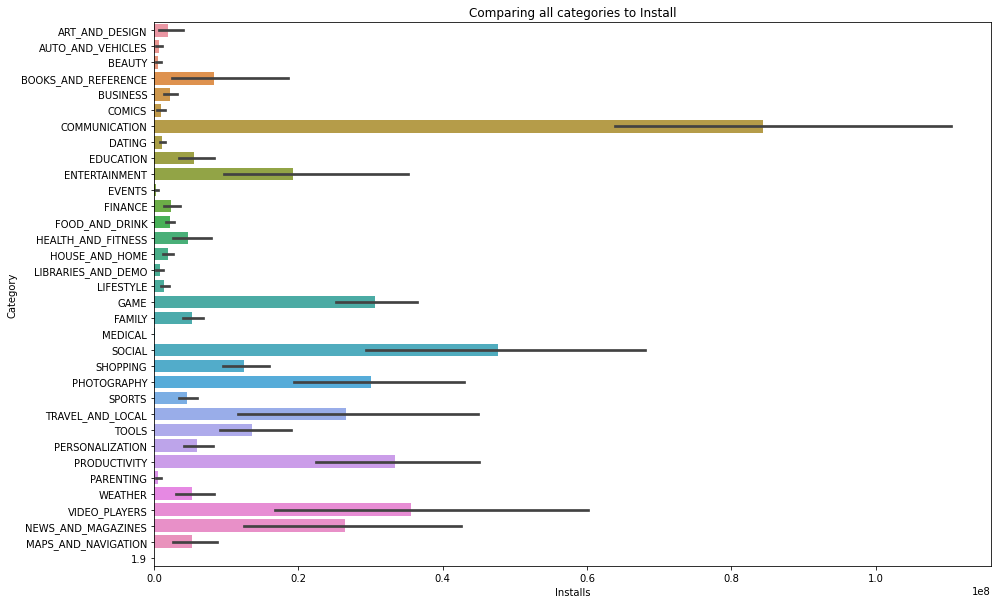

In [124]:
plt.figure(figsize=(15,10))
plt.title("Comparing all categories to Install")
sns.barplot(y=data["Category"],x=data['Installs'])
plt.show()

<div class="alert alert-warning">cummunication and social media have more number of installations</div>

In [130]:
data['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object

In [132]:
data[['App','Reviews','Category']].sort_values(by='Reviews',ascending=False).reset_index(drop=True).head(20).drop_duplicates('App').reset_index(drop=True)

,App,Reviews,Category
0,Facebook,78158306.0,SOCIAL
1,WhatsApp Messenger,69119316.0,COMMUNICATION
2,Instagram,66577446.0,SOCIAL
3,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION
4,Clash of Clans,44893888.0,GAME
5,Clean Master- Space Cleaner & Antivirus,42916526.0,TOOLS
6,Subway Surfers,27725352.0,GAME


#### Most Reviewed apps 